### https://github.com/DSLituiev/teaching

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

# Overfitting in Supervised Machine Learning

Generally speaking, overfitting can occur in any type of machine learning problem (supervised, un-supervised, reinforcement), but for simplicity we will go through an example with Supervised ML. 

## Supervised ML 
A supervised ML problem can be formulated as following (see [Y. Abu-Mostafa's lectures for greater detail](https://www.youtube.com/playlist?list=PLD63A284B7615313A) ):

### Supervised ML framework
#### Given
... unknown real-world function + probabilistic model for the error term:

$$f: X \rightarrow y$$

    predictors (independent variables) 
    target (outcome variable)
    
Or conditional distribution: $P(y|X)$

#### Learn 
... a model function based on a train dataset:

$$g: X_D \rightarrow \hat{y}_D$$

... that is able to predict target data so that

$$\hat{y}_D \approx{y}_D $$

    predictors 
    ->
    prediction
    
### Three basic components to a model itself:
+ **parameters** / coefficients / weights
+ **model architecture**: number of layers, numbre of nodes and vertices connecting them, number of parameters
+ **hyperparameters**: parameter of the model architecture + penalization parameters that are not used in prediction, but only in training.
    
### Two basic procedures: 

+ **Learn** an approximation function $g \approx f$ that maps predictors $X$ to the target $y$ by:
  * selecting best model
  * inferring best parameters
+ **Predict** outcome variable on the validation set

### Learning can be formulated in several synonymous ways:

+ minimize _distance_ between predicted and observed target
+ maximize _accuracy_ of the prediction
+ maximize _likelihood_ of the parameters with given data

In any of the above cases, there must be a probabilistic assumption about how data is generated or in other words about probability distribution of the prediction error

### Two regimes :
+ **train** : learn & predict
+ **test/validation**: predict

### Two performance metrics of prediction:
+ train error
+ validation error
Error: how _far off_ is predicted target $\hat{y}$ from the observed target $y$

## Overfitting: 
+ low train error
+ high validation error


In [12]:
# ![train and test error](http://blog.fliptop.com/wp-content/uploads/2015/03/highvariance.png)
Image(url = "http://blog.fliptop.com/wp-content/uploads/2015/03/highvariance.png", width=500)

## Examples of overfitting

### Example 1: more predictors than samples ($N < P$)
#### Sometimes several models (or infinite set of parameters) explain data equally good
#### Which model do we pick in hope that it will predict unseen data best? 
#### ...

####  Consider under-determined system of equations :
($N < P$), i.e. more independent variables (P) than equations / examples

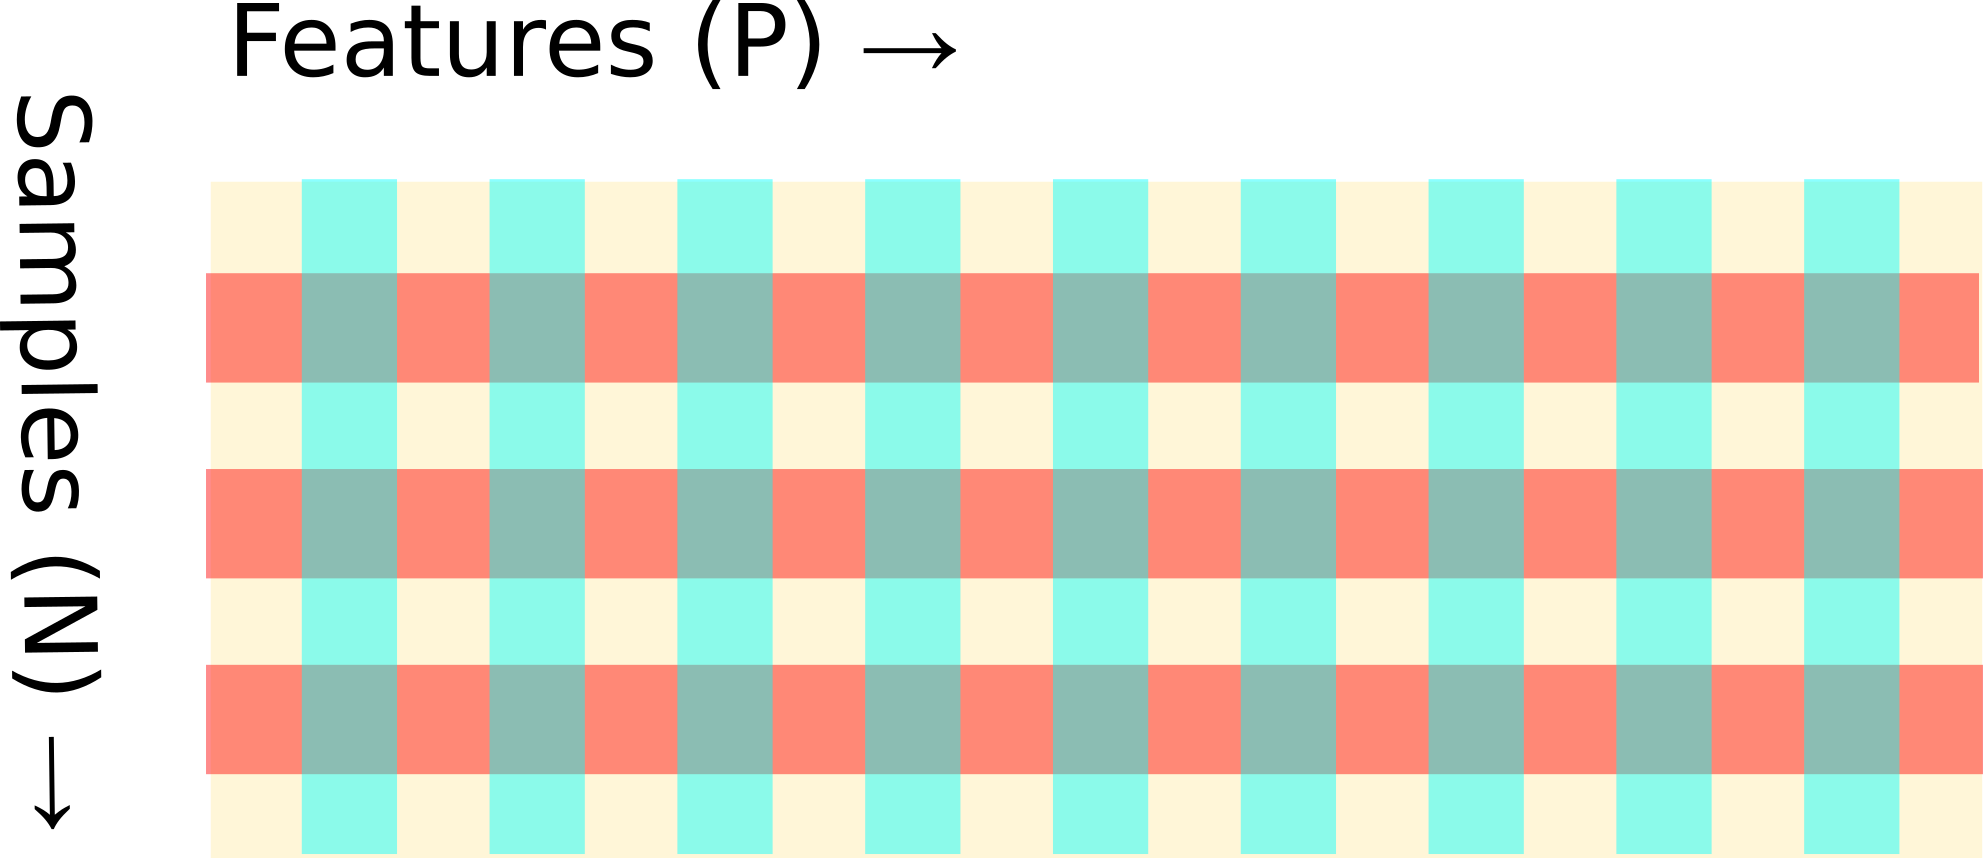

In [9]:
# ![N<P](./table.png)
Image(filename = "table.png", width=500)

solve for $\beta$, not $X$:

$$ y_1 = \beta_1 \cdot x_{1,1} + \beta_2 \cdot x_{1,2} + \beta_3 \cdot x_{1,3} $$
$$ y_2 = \beta_1 \cdot x_{2,1} + \beta_2 \cdot x_{2,2} + \beta_3 \cdot x_{2,3} $$

$$y_k = \sum_k b_j \cdot x_{jk} $$
$$ \mathbf{y} = X \beta $$

There will be more than one solution!

#### Our example

In [145]:
X = np.array([[0,1,0], [0,0,1], [1,0,0], [1,1,1]]).T
y = np.c_[3,4,5]
X

array([[0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 1, 0, 1]])

In [146]:
print("""this is a solution:""")
beta = np.r_[2,3,1,2] 
X.dot(beta)

this is a solution:


array([3, 4, 5])

In [147]:
print("""... and this is a solution as well:""")
beta = np.r_[3,4,2,1]
X.dot(beta)

... and this is a solution as well:


array([3, 4, 5])

#### From linear algebra perspective:

the system of equations is sloppy, it admits multiple solutions

#### From probabilistic / machine learning point of view:
Multiple model are able to produce the same result. Which model will you believe more?

[extended material](linear_algebra.ipynb)

#### ...
#### Sometimes several models (or infinite set of parameters) explain data equally best
#### Which model do we pick in hope that it will predict unseen data best? 
#### Use Occam's razor!
+ pick the _simplest_ model possible
+ there can be different meaning to _simplest_ model in sense of parameter magnitude. To force a model to be simpler, we can add different _norms_ of the parameter vector to our prediction error:
  * L1 / lasso :  $ \sum_j |\beta_j|$
  * L2 / ridge, Tikhonov regularization:  $\sum_j \beta_j^2$
  * L1 + L2 / elastic net
  * max-norm: $\max_j |\beta_j|$
  
Finally we get:

    loss = prediction_error + weight_penalty

### [Example 2 (extended): Different number of predictors in linear model](participants_synthetic_set.ipynb)

OK, so now we saw that overfitting happens when the model is too expressive (has more degrees of freedom) for the given data set size. To overcome overfitting we do _regularization_.

## Regularization is set of techniques to reduce over-fitting
### Two types of regularization

+ Weight penalization / decay
+ Stochastic penalization (Drop-out)

### Regularization works by forcing a model to be simpler in a sense

## [step back] What is error / loss / distance between prediction and observation?

+ For continuous cases, most times it is L2 norm = mean squared error
    * this assumes normal distribution of noise
    
+ For discrete cases it is mis-classification rate

+ In general, both cases are dealing with a quantity proportional:
    * negative log-likelihood 
    * cross-entropy
    * KL divergence

## Probabilistic framework

Data is generated by a distribution $y \sim P(y|X)$
We seek an approximating probabilistic model $y \sim Q(y|X)$

### Possible formulations of _optimal_ predictive model

Same thing:

+ minimize Kullback–Leibler divergence by minimizing the cross-entropy:
$$\mathrm{KL}[ P || Q ] = \mathbb{E}_P \log\left(\frac{P}{Q} \right) = H(P,Q)  - H(P) $$
$$H(P,Q) = -\mathbb{E}_P \log(Q) $$

+ maximum likelihood:

    maximize likelihood of the parameters $\theta$ of the model $Q(y|x, \theta)$ given observed $\{x,y\}$ points drawn from the real-world distribution $P(y|x)$
    
$$\mathrm{argmin}_\theta \mathbb{E}_{P(y|x)} \log Q(y|x, \theta) $$

+ minimize loss


## Weight penalization as prior in Bayesian framework

### Likelihood

$$
L(\boldsymbol\beta|X,y) = P(y|X, \boldsymbol\beta)
$$

For normal distribution:
$$
P(y|X, \boldsymbol\beta) = \frac{1}{\sqrt{2\,\pi}\, \sigma} \cdot \exp(-\boldsymbol\epsilon{\Sigma^{-1}} \boldsymbol\epsilon)
$$

$$\epsilon = \mathbf{y} - \hat{\mathbf{y}} = \mathbf{y} - X\,\beta$$

If we assume all predictors are independent and identically distributed (same noise):
$$
P(\mathbf{y}|X, \boldsymbol\beta) \propto \frac{1}{\sqrt{2\,\pi}\, \sigma} \cdot \exp\left(-\frac{\boldsymbol\epsilon\cdot \boldsymbol\epsilon}{\sigma^2}\right)
$$


Maximization of likelihood is the same as minimization of negative log-likelihood, which leads to ordinary least squares (OLS) solution for (Gaussian) linear regression:

$$-\log P(\mathbf{y}|X, \boldsymbol\beta)  \propto {\boldsymbol\epsilon\cdot \boldsymbol\epsilon} = \lVert \mathbf{y} - X\,\boldsymbol\beta \rVert^2 $$

### Posterior: include some believe about the weights:

$$
P(\beta| \mathbf{y}, X) = \frac{P(\mathbf{y}|X, \boldsymbol\beta) \cdot P(\boldsymbol\beta)}{\int_\boldsymbol\beta' P(\mathbf{y}|X, \boldsymbol\beta') \cdot P(\boldsymbol\beta')}
= \frac{P(\mathbf{y}|X, \boldsymbol\beta) \cdot P(\boldsymbol\beta)}{ P(\mathbf{y}|X)}
$$

Taking negative logarithm, we get negative-log-posterior, which we will minimize:
$$
-\log P(\boldsymbol\beta|\mathbf{y}, X) = -\log  P(\mathbf{y}|X, \boldsymbol\beta) - \log P(\boldsymbol\beta) + \log {Z}
$$

We can see that negative log-prior [believe about the weight magnitude] is a the same as penalty weights. Now our loss is:

$$-\log P(\boldsymbol\beta| \mathbf{y}, X)  \propto {\epsilon^2} + \mathrm{penalty} + \mathrm{constant}$$

$$-\log P(\boldsymbol\beta| \mathbf{y}, X)  \propto \lVert \mathbf{y} - X\,\beta \rVert ^2 + \lambda \lVert \beta \rVert^p $$

Where $\lambda$ is the penalization hyper-parameter and $\lVert \beta \rVert^p  = \sum_j \beta_j^p$ is some norm:
+ max ($p=\infty$)
+ L1 ($p=1$)
+ L2 ($p=2$)
+ L1+L2
+ other norms, incl. fractional

## Do we have to care about $N<P$ in deep learning models?

Example of CNN for MNIST in Keras: 2 convolutional layers with 32 filters 3x3 and 128 fully connected layers, pool 2x2.

    input 28*28 = 784
    filters: two conv layers, each 32*(3*3+1) = 320

    dense: 4608 * 128 = 589824 weights

    Total: 590'464 weights

Almost 600'000 parameters

Train set: 60'000 samples

## Drop-out in linear regression as a penalty factor:

$$\hat{\mathbf{w}} = \mathrm{argmin}_\mathbf{w} \mathrm{logloss} $$

$$ \mathrm{logloss} = \mathbb{E}_{R\sim\mathrm{Bernoulli}(p)}
\left[ \left\lVert \mathbf{y} - (R \odot X) \mathbf{w} \right\rVert^2 \right] $$

$$\mathrm{logloss} = \mathbb{E}_{R_j^i\sim\mathrm{Bernoulli}(p)}
\left[ \left\lVert y^i - R_j^i \cdot X_j^i \cdot w^j \right\rVert^2 \right] $$


Taking the expectation:

$$\mathrm{logloss} = 
\left\lVert y^i - p \cdot X_j^i \cdot w^j \right\rVert^2  +  p \, (1-p) \, w_j X^j_i  \cdot X^i_{\hat{j}} \cdot w^{\hat{j}} $$

$$\mathrm{logloss} = 
\left\lVert \mathbf{y} - p \cdot X \cdot \mathbf{w} \right\rVert^2  + 
p \, (1-p) \, \left\lVert  \Gamma \mathbf{w} \right\rVert^2 $$

where $\Gamma = (\mathrm{diag}(X^T X))^{1/2}$

#### Thus drop-out can be seen as a stochastic penalization technique

#### Some hints for the derivation:
Bernoulli distribution 
$$P(x|p) = p^x \cdot p^{1-x}$$
$$\mathbb{E}(x) = p $$
$$\mathbb{E}(x^2) = p $$
$$\mathbb{E}(x_i\cdot x_j) = p^2 $$


$$\mathbb{E}(x_i^{\hat{j}}\cdot x_j^i) 
= (1-\delta_j^{\hat{j}}) \cdot p + \delta_j^{\hat{j}} \cdot p^2
= p + (p^2 - p) \cdot \delta_j^{\hat{j}}
$$



[see Srivastava et al., 2014](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)

## Variance-bias trade-off

### Out-of sample prediction error
how far off is this particular model from real data


### Average model
a model of given kind (i.e. with fixed architecture and hyperparameters) trained on all possible sets of data drawn from real world (it is an abstract notion!)

### Bias:
how far off is an average model of this kind from the real data


### Variance 
how far is this particular model off from an average model of this kind

[see](https://work.caltech.edu/library/080.pdf)

## Analogies

Imagine a regular mattress --> low variance

Imagine a mattress that perfectly fits your shape when you lie on your left side with your left knee and elbow bent --> high variance